In [1]:
#Importowanie danych z lokalnego dysku
#processed.cleveland_transformed.data jest to plik juz ze zmienionymi danymi

import pandas as pd 
path = 'C:/Users/maksd/OneDrive/Pulpit/PRO/ProjektPRO/'

df = pd.read_csv(path + 'processed.cleveland_transformed.data', header = None, names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']) 
print(df.shape)
df.head(10)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [4]:
# Rozkład kategorii.
class_freq = (df.groupby('num').size())
print (type(class_freq))
print(class_freq)

<class 'pandas.core.series.Series'>
num
0    164
1     55
2     36
3     35
4     13
dtype: int64


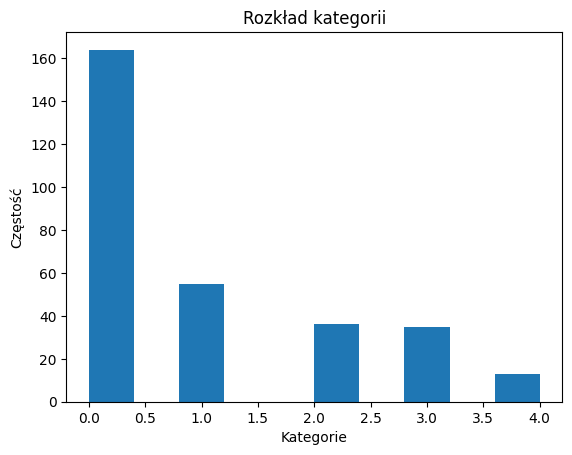

In [5]:
# Rozkładu kategorii, wykres słupkowy  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.hist( df['num'] )
plt.xlabel('Kategorie')
plt.ylabel('Częstość')
plt.title('Rozkład kategorii')
plt.show()

In [6]:
# Standaryzacja wartosci
from sklearn.preprocessing import StandardScaler
X = df.iloc[:,:13]
y = df.iloc[:,13:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

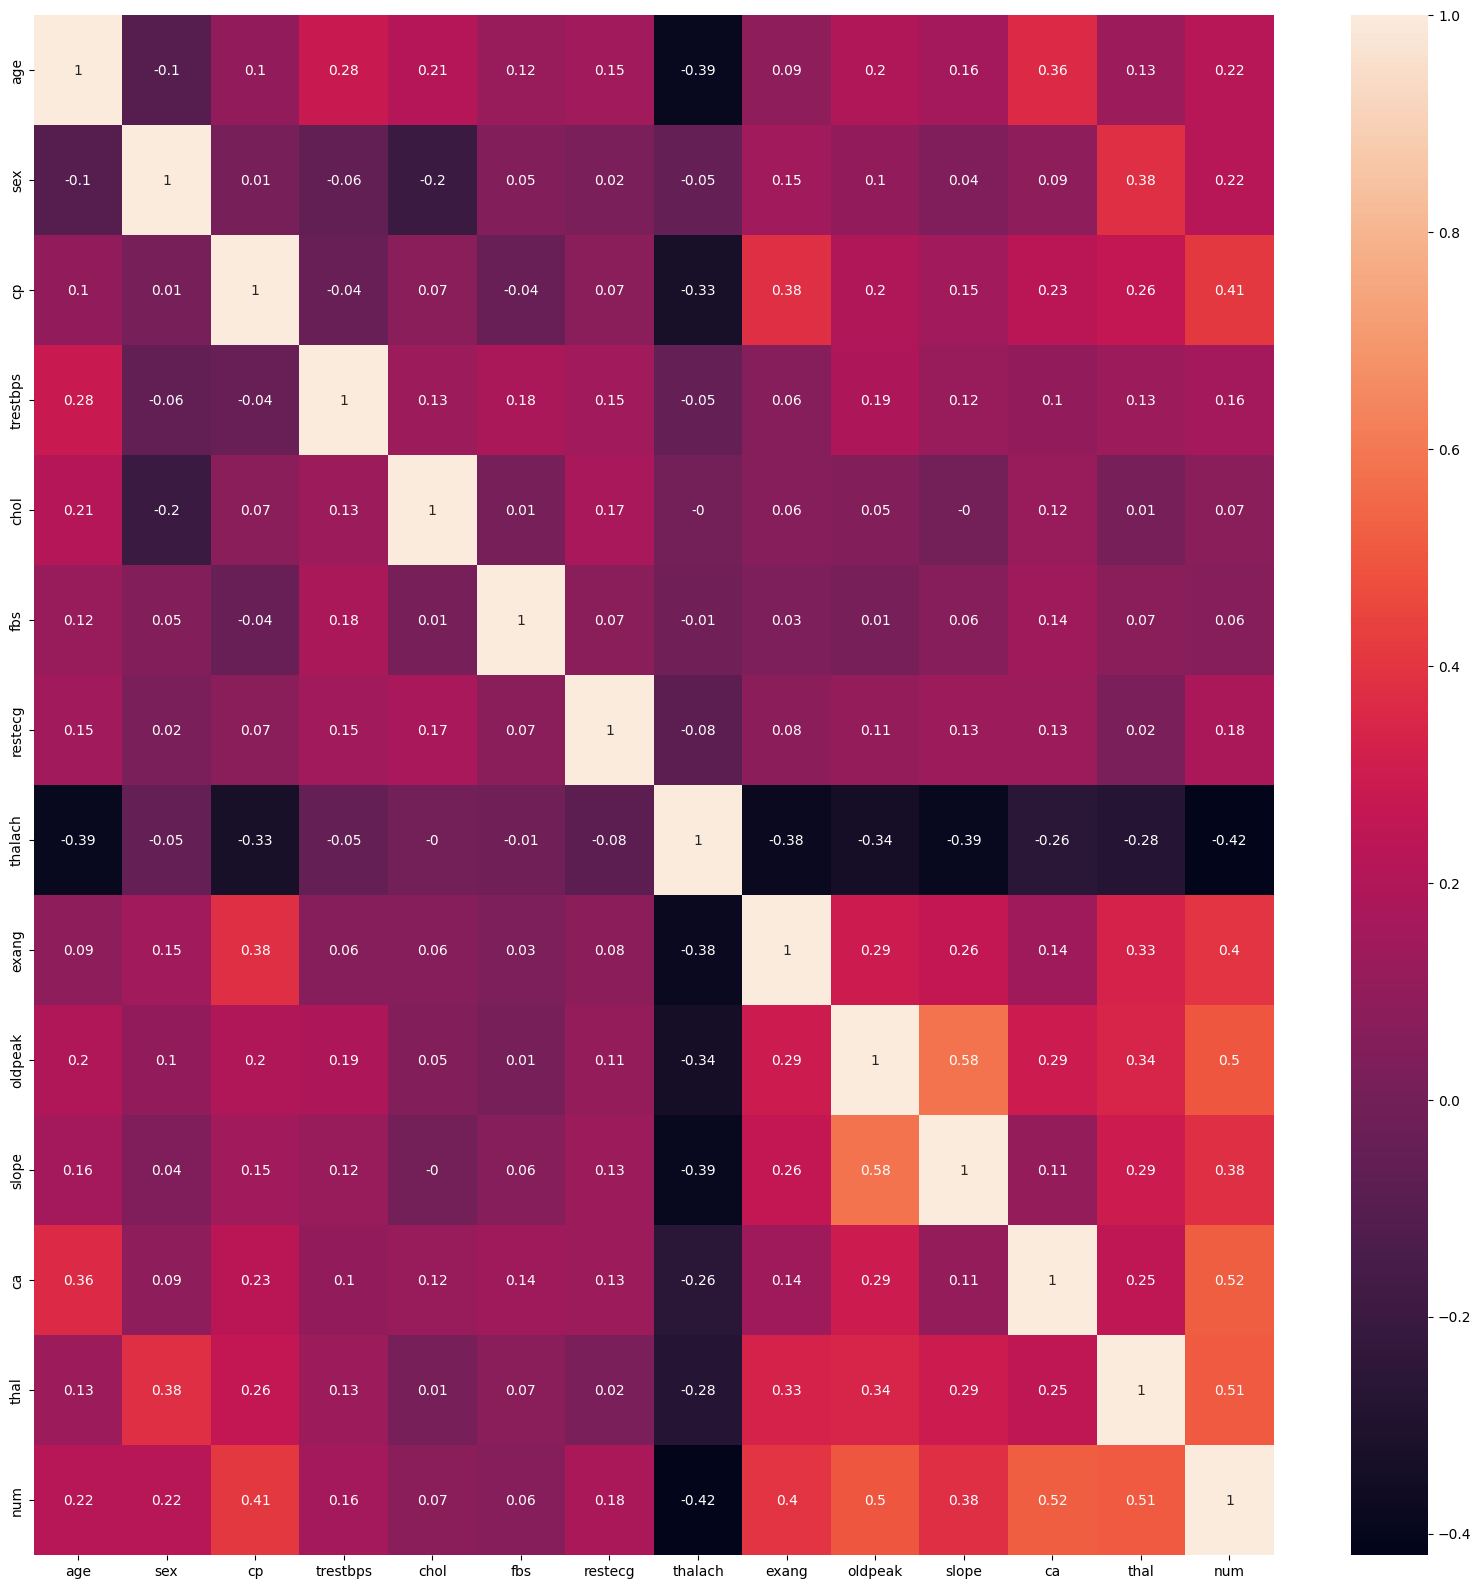

In [8]:
import seaborn as sns
c = df.corr().round(2)

plt.figure(figsize=(20,20))
sns.heatmap(c, annot=True)

plt.show()

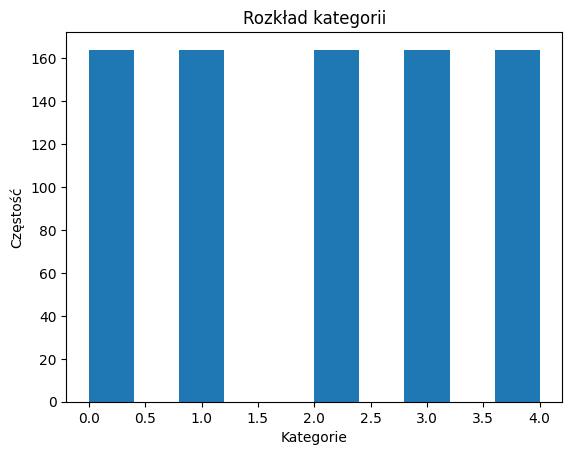

In [9]:
# Rozkładu kategorii po over-samplingu, wykres słupkowy  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

plt.hist( y_resampled['num'] )
plt.xlabel('Kategorie')
plt.ylabel('Częstość')
plt.title('Rozkład kategorii')
plt.show()

In [10]:
# Podzial na zbior testowy i treningowy
from sklearn.model_selection import train_test_split

X = df.iloc[:,:13]
y = df.iloc[:,13:]
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(615, 13)
(205, 13)
(615, 1)
(205, 1)


In [11]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score

tree_clf = DecisionTreeClassifier(max_depth=20, criterion='entropy') 
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, predictions)
precision_dt = precision_score(y_test, predictions, average='weighted')
recall_dt = recall_score(y_test, predictions, average='weighted')
f1measure_dt = f1_score(y_test, predictions, average='weighted')


print('Accuracy:', accuracy_dt)
print(confusion_matrix(y_test, predictions))
print('Precision:', precision_dt)
print('Recall:', recall_dt)
print('F1 measure:', f1measure_dt)

Accuracy: 0.6829268292682927
[[23  7  0  4  0]
 [ 5 34  7  3  1]
 [ 3  6 22  5  6]
 [ 2  0  7 32  1]
 [ 0  2  3  3 29]]
Precision: 0.6813604859568237
Recall: 0.6829268292682927
F1 measure: 0.6814818533236583


In [12]:
#Bagging 
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier(tree_clf, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)

predictions_bagging = bagging_classifier.predict(X_test)

accuracy_bagging = accuracy_score(y_test, predictions_bagging)
precision_bagging = precision_score(y_test, predictions_bagging, average='weighted')
recall_bagging = recall_score(y_test, predictions_bagging, average='weighted')
f1measure_bagging = f1_score(y_test, predictions_bagging, average='weighted')

print('Bagging Accuracy:', accuracy_bagging)
print('Bagging Confusion Matrix:\n', confusion_matrix(y_test, predictions_bagging))
print('Bagging Precision:', precision_bagging)
print('Bagging Recall:', recall_bagging)
print('Bagging F1 measure:', f1measure_bagging)

Bagging Accuracy: 0.8
Bagging Confusion Matrix:
 [[27  5  0  2  0]
 [ 3 37  7  3  0]
 [ 0  2 31  4  5]
 [ 0  4  5 32  1]
 [ 0  0  0  0 37]]
Bagging Precision: 0.8001874806893277
Bagging Recall: 0.8
Bagging F1 measure: 0.7984801869616491


In [16]:
#Klasyfikator Bayesowski
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_train,y_train)
predictions = NB_clf.predict(X_test)

accuracy_b = accuracy_score(y_test, predictions)
precision_b = precision_score(y_test, predictions, average='weighted')
recall_b = recall_score(y_test, predictions, average='weighted')
f1measure_b = f1_score (y_test, predictions, average='weighted')

print('Accuracy:', accuracy_b)
print('Precision:', precision_b)
print('Recall:', recall_b)
print('F1 measure:',f1measure_b)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.5526315789473685
Precision: 0.6698716488190173
Recall: 0.5526315789473685
F1 measure: 0.5871746674378253
[[35  5  0  0  4]
 [ 1  1  2  0  5]
 [ 0  3  2  1  3]
 [ 0  1  1  1  6]
 [ 0  1  0  1  3]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88        44
           1       0.09      0.11      0.10         9
           2       0.40      0.22      0.29         9
           3       0.33      0.11      0.17         9
           4       0.14      0.60      0.23         5

    accuracy                           0.55        76
   macro avg       0.39      0.37      0.33        76
weighted avg       0.67      0.55      0.59        76



In [23]:
#testowanie przez 10 epok
import random

decisontree_accuracies = []
decision_tree_f1_scores = []
decision_tree_precision = []
decision_tree_recall = []

for i in range(10):
    
    random_state = random.randint(1, 1000)
    train, test = train_test_split(df, test_size=0.25, random_state=random_state, shuffle=True)

    X_train = train.iloc[:,:13]
    y_train = train.iloc[:,13:] 
    X_test = test.iloc[:,:13]
    y_test = test.iloc[:,13:]
    #print(X_train.shape)
    #print(X_test.shape)


    tree_clf = DecisionTreeClassifier(max_depth=20, criterion='entropy') 
    tree_clf.fit(X_train, y_train)
    predictions = tree_clf.predict(X_test)
    
    f1 = f1_score(y_test, predictions, average='macro')
    accuracy = accuracy_score(y_test, predictions)
    precision_dt = precision_score(y_test, predictions, average='weighted')
    recall_dt = recall_score(y_test, predictions, average='weighted')
    print('Accuracy:', accuracy)
    #print('F1: ', f1)

    decisontree_accuracies.append(accuracy)
    decision_tree_f1_scores.append(f1)
    decision_tree_precision.append(precision_dt)
    decision_tree_recall.append(recall_dt)

mean_accuracy_dt = np.mean(decisontree_accuracies)
std_dev_accuracy_dt = np.std(decisontree_accuracies)
mean_f1_score_dt = np.mean(decision_tree_f1_scores)
mean_precision_f1 = np.mean(decision_tree_precision)
mean_recall_f1 = np.mean(decision_tree_recall)



print(f"Średnia trafność: {mean_accuracy_dt}")
print(f"Odchylenie standardowe trafności: {std_dev_accuracy_dt}")
print(f"Średnie precision:, {mean_precision_f1}")
print(f"Średni recall:, {mean_recall_f1}")
print(f"Średnia F1 miara: {mean_f1_score_dt}")

Accuracy: 0.5
Accuracy: 0.5263157894736842
Accuracy: 0.5263157894736842
Accuracy: 0.5
Accuracy: 0.5263157894736842
Accuracy: 0.4868421052631579
Accuracy: 0.5394736842105263
Accuracy: 0.5263157894736842
Accuracy: 0.5921052631578947
Accuracy: 0.5131578947368421
Średnia trafność: 0.5236842105263159
Odchylenie standardowe trafności: 0.027474490812922484
Średnie precision:, 0.5375224833127467
Średni recall:, 0.5236842105263159
Średnia F1 miara: 0.2887365676154981


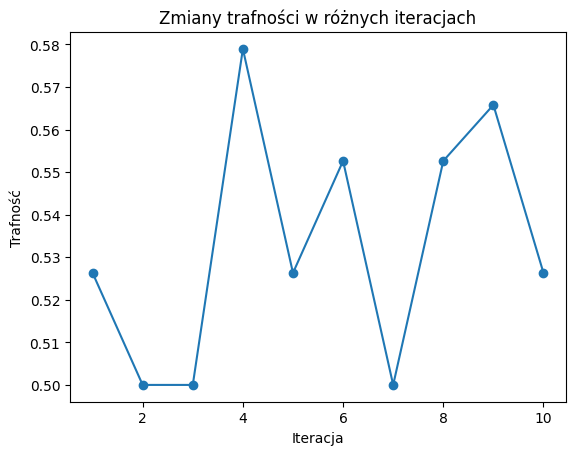

In [34]:
plt.plot(range(1, 11), decisontree_accuracies, marker='o')
plt.xlabel('Iteracja')
plt.ylabel('Trafność')
plt.title('Zmiany trafności w różnych iteracjach')
plt.show()

In [20]:
#testowanie przez 10 epok
import random

bayes_accuracies = []
bayes_f1_scores = []
bayes_precision = []
bayes_recall = []


for i in range(10):
    
    random_state = random.randint(1, 1000)
    train, test = train_test_split(df, test_size=0.25, random_state=random_state, shuffle=True)

    X_train = train.iloc[:,:13]
    y_train = train.iloc[:,13:] 
    X_test = test.iloc[:,:13]
    y_test = test.iloc[:,13:]
    #print(X_train.shape)
    #print(X_test.shape)


    NB_clf = GaussianNB()
    NB_clf.fit(X_train,y_train)
    predictions = NB_clf.predict(X_test)
    
    accuracy_b = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    precision_b = precision_score(y_test, predictions, average='weighted')
    recall_b = recall_score(y_test, predictions, average='weighted')
    print('Accuracy:', accuracy_b)

    bayes_accuracies.append(accuracy_b)
    bayes_f1_scores.append(f1)
    bayes_precision.append(precision_b)
    bayes_recall.append(recall_b)
    

mean_accuracy2_b = np.mean(bayes_accuracies)
std_dev_accuracy2_b = np.std(bayes_accuracies)
mean_f1_score_b = np.mean(bayes_f1_scores)
mean_precision_b = np.mean(bayes_precision)
mean_recall_b = np.mean(bayes_recall)


print(f"Średnia trafność: {mean_accuracy2_b}")
print(f"Odchylenie standardowe trafności: {std_dev_accuracy2_b}")
print(f"Średnie precision:, {mean_precision_b}")
print(f"Średni recall:, {mean_recall_b}")
print(f"Średnia F1 miara: {mean_f1_score_b}")

Accuracy: 0.5394736842105263
Accuracy: 0.5394736842105263
Accuracy: 0.47368421052631576
Accuracy: 0.5131578947368421
Accuracy: 0.5526315789473685
Accuracy: 0.5526315789473685
Accuracy: 0.631578947368421
Accuracy: 0.4605263157894737
Accuracy: 0.5
Accuracy: 0.6052631578947368
Średnia trafność: 0.536842105263158
Odchylenie standardowe trafności: 0.05089231475214136
Średnie precision:, 0.5881403646947594
Średni recall:, 0.536842105263158
Średnia F1 miara: 0.32687302798267137


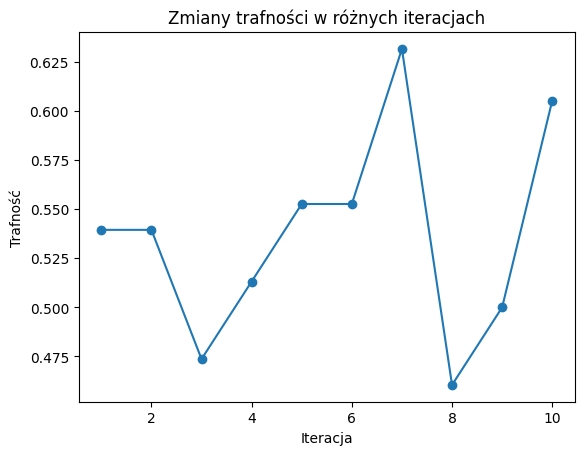

In [21]:
plt.plot(range(1, 11), bayes_accuracies, marker='o')
plt.xlabel('Iteracja')
plt.ylabel('Trafność')
plt.title('Zmiany trafności w różnych iteracjach')
plt.show()

In [22]:
# GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,40,50,60,70,80,90,100]
}  

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'accuracy',
                n_jobs = 1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions, average='weighted'))


best score 0.5505314009661836
best param {'criterion': 'gini', 'max_depth': 2}
Accuracy: 0.5657894736842105
[[41  0  0  4  0]
 [ 9  0  0  4  0]
 [ 3  0  0  6  0]
 [ 3  0  0  2  0]
 [ 1  0  0  3  0]]
F1 measure: 0.48697110423116624


In [150]:
result1 = ["1", "Decision Tree"]
result1.append(mean_accuracy_dt)
result1.append(mean_recall_f1)
result1.append(mean_precision_f1)
result1.append(mean_f1_score_dt)

In [151]:
result2 = ["2", "Bayes"]
result2.append(mean_accuracy2_b)
result2.append(mean_recall_b)
result2.append(mean_precision_b)
result2.append(mean_f1_score_b)

In [152]:
#Wyswietlanie srednich wartosci dla 10 iteracji
from prettytable import PrettyTable
Result_table = PrettyTable(["No.","Model","Accuracy","Recall","Precision","F1 Score"])
Result_table.add_row(result1)
Result_table.add_row(result2)
print(Result_table)

+-----+---------------+--------------------+--------------------+--------------------+---------------------+
| No. |     Model     |      Accuracy      |       Recall       |     Precision      |       F1 Score      |
+-----+---------------+--------------------+--------------------+--------------------+---------------------+
|  1  | Decision Tree | 0.5236842105263159 | 0.5236842105263159 | 0.5375224833127467 |  0.2887365676154981 |
|  2  |     Bayes     | 0.536842105263158  | 0.536842105263158  | 0.5881403646947594 | 0.32687302798267137 |
+-----+---------------+--------------------+--------------------+--------------------+---------------------+


In [27]:
df ['num'] = df.num.map({0: 0, 1: 1, 2: 1, 3: 3, 4: 4})

In [28]:
# OBECNY PODZIAl: 0 -> 0, 1 -> 1, 2 -> 1, 3 -> 3, 4 -> 4

In [29]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [33]:
train, test = train_test_split(df, test_size=0.25, random_state=random_state, shuffle=True)
X_train = train.iloc[:,:13]
y_train = train.iloc[:,13:] 
X_test = test.iloc[:,:13]
y_test = test.iloc[:,13:]

In [48]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy') 
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)

accuracy_dt_2 = accuracy_score(y_test, predictions)
precision_dt_2 = precision_score(y_test, predictions, average='weighted')
recall_dt_2 = recall_score(y_test, predictions, average='weighted')
f1_dt_2 = f1_score(y_test, predictions, average='weighted')

print('Accuracy:', accuracy_dt_2)
print('Precision:', precision_dt_2)
print('Recall:', recall_dt_2)
print('F1 measure:', f1_dt_2)
print(confusion_matrix(y_test, predictions))

Accuracy: 0.6578947368421053
Precision: 0.5651147098515521
Recall: 0.6578947368421053
F1 measure: 0.6079514625363784
[[40  5  0  0]
 [10 10  0  0]
 [ 1  6  0  0]
 [ 1  3  0  0]]


In [47]:
#testowanie przez 10 epok
import random

decisontreegrouped_accuracies = []
decision_tree_groupped_f1_scores = []
decision_tree_groupped_precisions = []
decision_tree_groupped_recalls = []


for i in range(10):
    
    random_state = random.randint(1, 1000)
    train, test = train_test_split(df, test_size=0.25, random_state=random_state, shuffle=True)

    X_train = train.iloc[:,:13]
    y_train = train.iloc[:,13:] 
    X_test = test.iloc[:,:13]
    y_test = test.iloc[:,13:]
    #print(X_train.shape)
    #print(X_test.shape)


    tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy') 
    tree_clf.fit(X_train, y_train)
    predictions = tree_clf.predict(X_test)
    
    accuracy_dt_2 = accuracy_score(y_test, predictions)
    f1_dt_2 = f1_score(y_test, predictions, average='macro')
    print('Accuracy:', accuracy_dt_2)
    recall_dt_2 = recall_score(y_test, predictions, average='macro')
    f1_dt_2 = f1_score(y_test, predictions, average='macro')

    decisontreegrouped_accuracies.append(accuracy_dt_2)
    decision_tree_groupped_precisions.append(precision_dt_2)
    decision_tree_groupped_recalls.append(recall_dt_2)
    decision_tree_groupped_f1_scores.append(f1_dt_2)

mean_accuracy_dt_groupped = np.mean(decisontreegrouped_accuracies)
std_dev_accuracy_dt_groupped = np.std(decisontreegrouped_accuracies)
mean_precision_dt_groupped = np.mean(decision_tree_groupped_precisions)
mean_recall_dt_groupped = np.mean(decision_tree_groupped_recalls)
mean_f1_score_dt_groupped = np.mean(decision_tree_groupped_f1_scores)

print(f"Średnia trafność: {mean_accuracy_dt_groupped}")
print(f"Odchylenie standardowe trafności: {std_dev_accuracy_dt_groupped}")
print(f"Średnia Precyzja: {mean_precision_dt_groupped}")
print(f"Średnia Recall: {mean_recall_dt_groupped}")
print(f"Średnia F1: {mean_f1_score_dt_groupped}")

Accuracy: 0.6710526315789473
Accuracy: 0.6052631578947368
Accuracy: 0.6578947368421053
Accuracy: 0.6447368421052632
Accuracy: 0.6447368421052632
Accuracy: 0.6842105263157895
Accuracy: 0.6447368421052632
Accuracy: 0.6052631578947368
Accuracy: 0.6052631578947368
Accuracy: 0.6578947368421053
Średnia trafność: 0.6421052631578947
Odchylenie standardowe trafności: 0.026836944808383084
Średnia Precyzja: 0.47982456140350893
Średnia Recall: 0.3458919530857305
Średnia F1: 0.31651609133367764


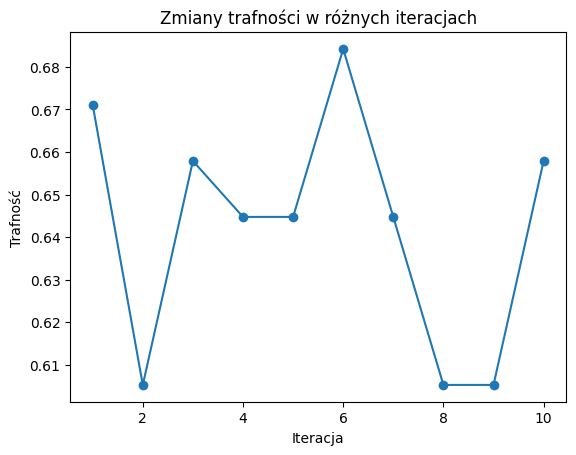

In [49]:
plt.plot(range(1, 11), decisontreegrouped_accuracies, marker='o')
plt.xlabel('Iteracja')
plt.ylabel('Trafność')
plt.title('Zmiany trafności w różnych iteracjach')
plt.show()

In [51]:
#Klasyfikator Bayesowski
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_train,y_train)
predictions = NB_clf.predict(X_test)

accuracy_b_2 = accuracy_score(y_test, predictions)
precision_b_2 = precision_score(y_test, predictions, average='weighted')
recall_b_2 = recall_score(y_test, predictions, average='weighted')
f1_b_2 = f1_score (y_test, predictions, average='weighted')

print('Accuracy:', accuracy_b_2)
print('Precision:', precision_b_2)
print('Recall:', recall_b_2)
print('F1 measure:', f1_b_2)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.5921052631578947
Precision: 0.6736842105263158
Recall: 0.5921052631578947
F1 measure: 0.6045883940620783
[[41  1  0  3]
 [ 4  3  3 10]
 [ 0  1  0  6]
 [ 0  1  2  1]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.50      0.15      0.23        20
           3       0.00      0.00      0.00         7
           4       0.05      0.25      0.08         4

    accuracy                           0.59        76
   macro avg       0.37      0.33      0.31        76
weighted avg       0.67      0.59      0.60        76



In [88]:
#testowanie przez 10 epok
import random

bayesgroupped_accuracies = []
bayes_groupped_precisions = []
bayes_groupped_recalls = []
bayes_groupped_f1_scores = []

for i in range(10):
    
    random_state = random.randint(1, 1000)
    train, test = train_test_split(df, test_size=0.25, random_state=random_state, shuffle=True)

    X_train = train.iloc[:,:13]
    y_train = train.iloc[:,13:] 
    X_test = test.iloc[:,:13]
    y_test = test.iloc[:,13:]
    #print(X_train.shape)
    #print(X_test.shape)


    NB_clf = GaussianNB()
    NB_clf.fit(X_train,y_train)
    predictions = NB_clf.predict(X_test)
    
    accuracy_b_2 = accuracy_score(y_test, predictions)
    precision_b_2 = precision_score(y_test, predictions, average='macro')
    recall_b_2 = recall_score(y_test, predictions, average='macro')
    f1_b_2 = f1_score(y_test, predictions, average='macro')
    print('Accuracy:', accuracy_score(y_test, predictions))

    bayesgroupped_accuracies.append(accuracy_b_2)
    bayes_groupped_precisions.append(precision_b_2)
    bayes_groupped_recalls.append(recall_b_2)
    bayes_groupped_f1_scores.append(f1_b_2)

mean_accuracy_b_groupped = np.mean(bayesgroupped_accuracies)
std_dev_accuracy_b_groupped = np.std(bayesgroupped_accuracies)
mean_precision_b_groupped = np.mean(bayes_groupped_precisions)
mean_recall_b_groupped = np.mean(bayes_groupped_recalls)
mean_f1_score_b_groupped = np.mean(bayes_groupped_f1_scores)

print(f"Średnia trafność: {mean_accuracy_b_groupped}")
print(f"Odchylenie standardowe trafności: {std_dev_accuracy_b_groupped}")
print(f"Średnia Precyzja: {mean_precision_b_groupped}")
print(f"Średnia Recall: {mean_recall_b_groupped}")
print(f"Średnia F1: {mean_f1_score_b_groupped}")

Accuracy: 0.6447368421052632
Accuracy: 0.6842105263157895
Accuracy: 0.6578947368421053
Accuracy: 0.6842105263157895
Accuracy: 0.618421052631579
Accuracy: 0.5394736842105263
Accuracy: 0.631578947368421
Accuracy: 0.6447368421052632
Accuracy: 0.5789473684210527
Accuracy: 0.5789473684210527
Średnia trafność: 0.6263157894736843
Odchylenie standardowe trafności: 0.045275396142329616
Średnia Precyzja: 0.41431438315461444
Średnia Recall: 0.4028998858704851
Średnia F1: 0.3999613484429579


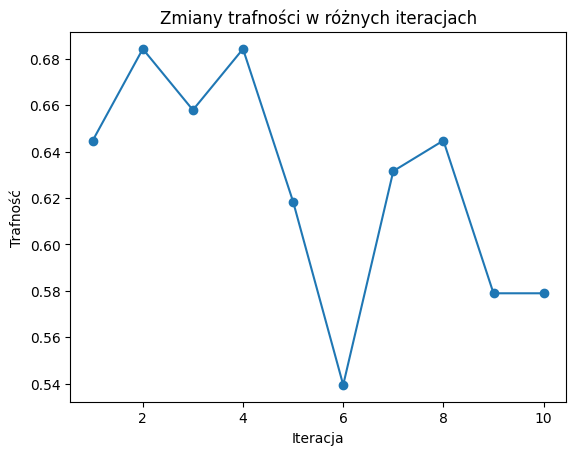

In [89]:
plt.plot(range(1, 11), bayesgroupped_accuracies, marker='o')
plt.xlabel('Iteracja')
plt.ylabel('Trafność')
plt.title('Zmiany trafności w różnych iteracjach')
plt.show()

In [38]:
# GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,40,50,60,70,80,90,100]
}  

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'accuracy',
                n_jobs = 1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions, average='weighted'))


best score 0.6474396135265701
best param {'criterion': 'entropy', 'max_depth': 4}
Accuracy: 0.5657894736842105
[[30  6  0  0]
 [ 9 11  4  0]
 [ 1  9  2  0]
 [ 1  3  0  0]]
F1 measure: 0.53527472196787


In [145]:
result1groupped = ["1", "Decision Tree"]
result1groupped.append(mean_accuracy_dt_groupped)
result1groupped.append(mean_recall_dt_groupped)
result1groupped.append(mean_precision_dt_groupped)
result1groupped.append(mean_f1_score_dt_groupped)

In [146]:
result2groupped = ["2", "Bayes"]
result2groupped.append(mean_accuracy_b_groupped)
result2groupped.append(mean_recall_b_groupped)
result2groupped.append(mean_precision_b_groupped)
result2groupped.append(mean_f1_score_b_groupped)

In [148]:
Result_table_groupped = PrettyTable(["No.","Model","Accuracy","Recall","Precision","F1 Score"])
Result_table_groupped.add_row(result1groupped)
Result_table_groupped.add_row(result2groupped)
print(Result_table_groupped)

+-----+---------------+--------------------+--------------------+---------------------+---------------------+
| No. |     Model     |      Accuracy      |       Recall       |      Precision      |       F1 Score      |
+-----+---------------+--------------------+--------------------+---------------------+---------------------+
|  1  | Decision Tree | 0.6421052631578947 | 0.3458919530857305 | 0.47982456140350893 | 0.31651609133367764 |
|  2  |     Bayes     | 0.6263157894736843 | 0.4028998858704851 | 0.41431438315461444 |  0.3999613484429579 |
+-----+---------------+--------------------+--------------------+---------------------+---------------------+


In [93]:
###################################### PODZIAL DANYCH NA DWIE GRUPY ########################################################
df['num'] = df.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [94]:
# OBECNY PODZIAl: 0 -> 0, 1,2,3,4 -> 1

In [95]:
class_freq = (df.groupby('num').size())
print (type(class_freq))
print(class_freq)

<class 'pandas.core.series.Series'>
num
0    164
1    139
dtype: int64


In [96]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [97]:
train, test = train_test_split(df, test_size=0.25, random_state=random_state, shuffle=True)
X_train = train.iloc[:,:13]
y_train = train.iloc[:,13:] 
X_test = test.iloc[:,:13]
y_test = test.iloc[:,13:]

In [101]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

tree_clf = DecisionTreeClassifier(max_depth=6, criterion='entropy') 
tree_clf.fit(X_train, y_train)
predictions = tree_clf.predict(X_test)

accuracy_dt_3 = accuracy_score(y_test, predictions)
precision_dt_3 = precision_score(y_test, predictions, average='weighted')
recall_dt_3 = recall_score(y_test, predictions, average='weighted')
f1_dt_3 = f1_score (y_test, predictions, average='weighted')

print('Accuracy:', accuracy_dt_3)
print('Precision:', precision_dt_3)
print('Recall:', recall_dt_3)
print('F1 measure:', f1_dt_3)
print(confusion_matrix(y_test, predictions))

Accuracy: 0.7631578947368421
Precision: 0.7641388417279759
Recall: 0.7631578947368421
F1 measure: 0.7614888171803716
[[34  7]
 [11 24]]


In [48]:
# GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

estimator = DecisionTreeClassifier()

hyperparam_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,40,50,60,70,80,90,100]
}  

grid = GridSearchCV(
                estimator,
                hyperparam_space,
                cv = 5,
                scoring = 'accuracy',
                n_jobs = 1)

grid.fit(X_train, y_train)
print('best score', grid.best_score_)
print('best param', grid.best_params_)

predictions = grid.predict(X_test)
print('Accuracy:', accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print('F1 measure:', f1_score (y_test, predictions, average='weighted'))


best score 0.7711111111111111
best param {'criterion': 'entropy', 'max_depth': 4}
Accuracy: 0.7631578947368421
[[30  6]
 [12 28]]
F1 measure: 0.7626654995076046


In [112]:
#Klasyfikator Bayesowski
from sklearn.naive_bayes import GaussianNB

NB_clf = GaussianNB()
NB_clf.fit(X_train,y_train)
predictions = NB_clf.predict(X_test)

accuracy_b_3 = accuracy_score(y_test, predictions)
precision_b_3 = precision_score(y_test, predictions, average='weighted')
recall_b_3 = recall_score(y_test, predictions, average='weighted')
f1_b_3 = f1_score (y_test, predictions, average='weighted')

print('Accuracy:', accuracy_b_3)
print('Precision:', precision_b_3)
print('Recall:', recall_b_3)
print('F1 measure:', f1_b_3)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8157894736842105
Precision: 0.817953420135705
Recall: 0.8157894736842105
F1 measure: 0.8163054695562435
[[35  8]
 [ 6 27]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        43
           1       0.77      0.82      0.79        33

    accuracy                           0.82        76
   macro avg       0.81      0.82      0.81        76
weighted avg       0.82      0.82      0.82        76



In [108]:
#testowanie przez 10 epok
import random

decisontreegrouped2_accuracies = []
decision_tree_groupped2_precisions = []
decision_tree_groupped2_recalls = []
decision_tree_groupped2_f1_scores = []

for i in range(10):
    
    random_state = random.randint(1, 1000)
    train, test = train_test_split(df, test_size=0.25, random_state=random_state, shuffle=True)

    X_train = train.iloc[:,:13]
    y_train = train.iloc[:,13:] 
    X_test = test.iloc[:,:13]
    y_test = test.iloc[:,13:]
    #print(X_train.shape)
    #print(X_test.shape)


    tree_clf = DecisionTreeClassifier(max_depth=2, criterion='gini') 
    tree_clf.fit(X_train, y_train)
    predictions = tree_clf.predict(X_test)
    
    accuracy_dt_3 = accuracy_score(y_test, predictions)
    precision_dt_3 = precision_score(y_test, predictions, average='macro')
    recall_dt_3 = recall_score(y_test, predictions, average='macro')
    f1_dt_3 = f1_score(y_test, predictions, average='macro')
    print('Accuracy:', accuracy_dt_3)


    decisontreegrouped2_accuracies.append(accuracy_dt_3)
    decision_tree_groupped2_precisions.append(precision_dt_3)
    decision_tree_groupped2_recalls.append(recall_dt_3)
    decision_tree_groupped2_f1_scores.append(f1_dt_3)

mean_accuracy_dt_groupped2 = np.mean(decisontreegrouped2_accuracies)
std_dev_accuracy_dt_groupped2 = np.std(decisontreegrouped2_accuracies)
mean_precision_dt_groupped2 = np.mean(decision_tree_groupped2_precisions)
mean_recall_dt_groupped2 = np.mean(decision_tree_groupped2_recalls)
mean_f1_score_dt_groupped2 = np.mean(decision_tree_groupped2_f1_scores)

print(f"Średnia trafność: {mean_accuracy_dt_groupped2}")
print(f"Odchylenie standardowe trafności: {std_dev_accuracy_dt_groupped2}")
print(f"Średnia Precyzja: {mean_precision_dt_groupped2}")
print(f"Średnia Recall: {mean_recall_dt_groupped2}")
print(f"Średnia F1: {mean_f1_score_dt_groupped2}")

Accuracy: 0.6578947368421053
Accuracy: 0.7631578947368421
Accuracy: 0.7631578947368421
Accuracy: 0.75
Accuracy: 0.75
Accuracy: 0.75
Accuracy: 0.7105263157894737
Accuracy: 0.75
Accuracy: 0.7763157894736842
Accuracy: 0.7368421052631579
Średnia trafność: 0.7407894736842104
Odchylenie standardowe trafności: 0.032256975452976996
Średnia Precyzja: 0.7593117939110426
Średnia Recall: 0.7269005669114994
Średnia F1: 0.7241781165940486


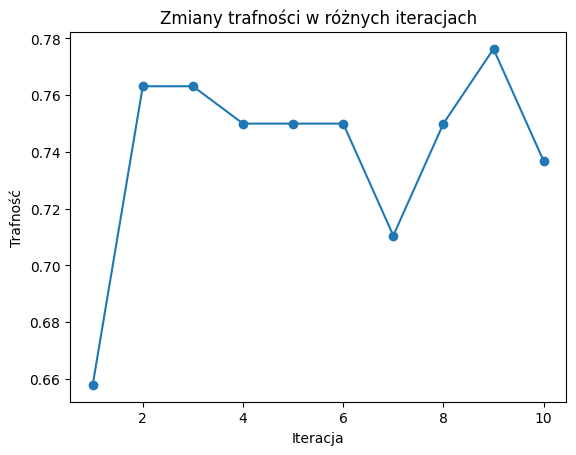

In [109]:
plt.plot(range(1, 11), decisontreegrouped2_accuracies, marker='o')
plt.xlabel('Iteracja')
plt.ylabel('Trafność')
plt.title('Zmiany trafności w różnych iteracjach')
plt.show()

In [119]:
#testowanie przez 10 epok
import random

bayesgroupped2_accuracies = []
bayes_groupped2_precisions = []
bayes_groupped2_recalls = []
bayes_groupped2_f1_scores = []

for i in range(10):
    
    random_state = random.randint(1, 1000)
    train, test = train_test_split(df, test_size=0.25, random_state=random_state, shuffle=True)

    X_train = train.iloc[:,:13]
    y_train = train.iloc[:,13:] 
    X_test = test.iloc[:,:13]
    y_test = test.iloc[:,13:]
    #print(X_train.shape)
    #print(X_test.shape)


    NB_clf = GaussianNB()
    NB_clf.fit(X_train,y_train)
    predictions = NB_clf.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, predictions))
    
    accuracy_b_3 = accuracy_score(y_test, predictions)
    precision_b_3 = precision_score(y_test, predictions, average='macro')
    recall_b_3 = recall_score(y_test, predictions, average='macro')
    f1_b_3 = f1_score(y_test, predictions, average='macro')
    print('Accuracy:', f1_b_3)

    bayesgroupped2_accuracies.append(accuracy_b_3)
    bayes_groupped2_precisions.append(precision_b_3)
    bayes_groupped2_recalls.append(recall_b_3)
    bayes_groupped2_f1_scores.append(f1_b_3)

mean_accuracy_b_groupped2 = np.mean(bayesgroupped2_accuracies)
std_dev_accuracy_b_groupped2 = np.std(bayesgroupped2_accuracies)
mean_precision_b_groupped2 = np.mean(bayes_groupped2_precisions)
mean_recall_b_groupped2 = np.mean(bayes_groupped2_recalls)
mean_f1_score_b_groupped2 = np.mean(bayes_groupped2_f1_scores)

print(f"Średnia trafność: {mean_accuracy_b_groupped2}")
print(f"Odchylenie standardowe trafności: {std_dev_accuracy_b_groupped2}")
print(f"Średnia Precyzja: {mean_precision_b_groupped2}")
print(f"Średnia Recall: {mean_recall_b_groupped2}")
print(f"Średnia F1: {mean_f1_score_b_groupped2}")

Accuracy: 0.8947368421052632
Accuracy: 0.8928823114869626
Accuracy: 0.8421052631578947
Accuracy: 0.8411149825783972
Accuracy: 0.8552631578947368
Accuracy: 0.8540247948315
Accuracy: 0.868421052631579
Accuracy: 0.8606016140865738
Accuracy: 0.8552631578947368
Accuracy: 0.8521662245800177
Accuracy: 0.868421052631579
Accuracy: 0.8606016140865738
Accuracy: 0.868421052631579
Accuracy: 0.8650568181818181
Accuracy: 0.8157894736842105
Accuracy: 0.8156618156618156
Accuracy: 0.8289473684210527
Accuracy: 0.8175438596491229
Accuracy: 0.868421052631579
Accuracy: 0.8637992831541219
Średnia trafność: 0.8565789473684211
Odchylenie standardowe trafności: 0.02158055193007465
Średnia Precyzja: 0.8585293611828009
Średnia Recall: 0.8511031921103527
Średnia F1: 0.8523453318296903


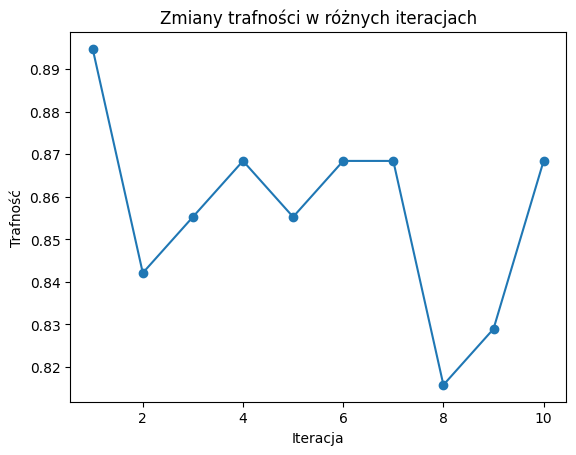

In [120]:
plt.plot(range(1, 11), bayesgroupped2_accuracies, marker='o')
plt.xlabel('Iteracja')
plt.ylabel('Trafność')
plt.title('Zmiany trafności w różnych iteracjach')
plt.show()

In [135]:
result1groupped2 = ["1", "Decision Tree"]
result1groupped2.append(mean_accuracy_dt_groupped2)
result1groupped2.append(mean_recall_dt_groupped2)
result1groupped2.append(mean_precision_dt_groupped2)
result1groupped2.append(mean_f1_score_dt_groupped2)

In [137]:
result2groupped2 = ["2", "Bayes"]
result2groupped2.append(mean_accuracy_b_groupped2)
result2groupped2.append(mean_recall_b_groupped2)
result2groupped2.append(mean_precision_b_groupped2)
result2groupped2.append(mean_f1_score_b_groupped2)

In [139]:
Result_table_groupped2 = PrettyTable(["No.","Model","Accuracy","Recall","Precision","F1 Score"])
Result_table_groupped2.add_row(result1groupped2)
Result_table_groupped2.add_row(result2groupped2)
print(Result_table_groupped2)

+-----+---------------+--------------------+--------------------+--------------------+--------------------+
| No. |     Model     |      Accuracy      |       Recall       |     Precision      |      F1 Score      |
+-----+---------------+--------------------+--------------------+--------------------+--------------------+
|  1  | Decision Tree | 0.7407894736842104 | 0.7269005669114994 | 0.7593117939110426 | 0.7241781165940486 |
|  2  |     Bayes     | 0.8565789473684211 | 0.8511031921103527 | 0.8585293611828009 | 0.8523453318296903 |
+-----+---------------+--------------------+--------------------+--------------------+--------------------+


In [153]:
print(Result_table)
print(Result_table_groupped)
print(Result_table_groupped2)

+-----+---------------+--------------------+--------------------+--------------------+---------------------+
| No. |     Model     |      Accuracy      |       Recall       |     Precision      |       F1 Score      |
+-----+---------------+--------------------+--------------------+--------------------+---------------------+
|  1  | Decision Tree | 0.5236842105263159 | 0.5236842105263159 | 0.5375224833127467 |  0.2887365676154981 |
|  2  |     Bayes     | 0.536842105263158  | 0.536842105263158  | 0.5881403646947594 | 0.32687302798267137 |
+-----+---------------+--------------------+--------------------+--------------------+---------------------+
+-----+---------------+--------------------+--------------------+---------------------+---------------------+
| No. |     Model     |      Accuracy      |       Recall       |      Precision      |       F1 Score      |
+-----+---------------+--------------------+--------------------+---------------------+---------------------+
|  1  | Decision